In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hull-tactical-market-prediction/train.csv
/kaggle/input/hull-tactical-market-prediction/test.csv
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_inference_server.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/templates.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/base_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/relay.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/kaggle_evaluation.proto
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2_grpc.py
/kaggl

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle_evaluation.default_inference_server
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
np.seterr(all='ignore')

pd.set_option('display.max_rows', 100)     
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)       
pd.set_option('display.max_colwidth', None)

## EDA

In [3]:
# load data
train = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')
test= pd.read_csv('/kaggle/input/hull-tactical-market-prediction/test.csv')

print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

Training data shape: (9048, 98)
Test data shape: (10, 99)


In [4]:
train.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9048 non-null   int64  
 1   D1                             9048 non-null   int64  
 2   D2                             9048 non-null   int64  
 3   D3                             9048 non-null   int64  
 4   D4                             9048 non-null   int64  
 5   D5                             9048 non-null   int64  
 6   D6                             9048 non-null   int64  
 7   D7                             9048 non-null   int64  
 8   D8                             9048 non-null   int64  
 9   D9                             9048 non-null   int64  
 10  E1                             7264 non-null   float64
 11  E10                            8042 non-null   float64
 12  E11                            8042 non-null   f

In [6]:
train.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,7264.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,7432.000000,8042.000000,8042.000000,8042.000000,8042.000000,2079.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,3501.000000,8042.000000,8042.000000,8042.000000,3508.000000,3508.000000,8042.000000,8042.000000,8042.000000,8042.000000,5831.000000,7030.000000,8042.000000,5765.000000,4005.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,7474.000000,7410.000000,7432.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,5511.000000,8042.000000,3315.000000,8042.000000,7537.000000,8042.000000,8042.000000,6039.000000,8042.000000,8042.000000,2999.000000,8042.000000,8042.000000,7537.000000,8042.000000,8042.000000,8042.000000,7536.000000,8042.000000,7537.000000,8042.000000,4509.000000,9048.000000,9048.000000,9048.000000
mean,4523.500000,0.031609,0.031609,0.047856,0.575265,0.190760,-0.238174,0.045756,0.142905,0.143236,1.563966,0.502853,0.125009,0.117931,0.012253,0.006982,0.488283,-0.049025,-0.011239,0.097240,0.116011,0.506894,0.907693,0.351029,0.016928,0.597827,0.121675,-0.032688,-0.272414,0.268242,0.743990,-0.518476,0.605833,0.550625,0.187362,0.457104,0.705587,0.572105,0.188823,-0.624245,0.054926,-0.287491,0.477686,-0.953019,-0.862432,0.461443,0.232409,0.272403,0.597729,0.086360,0.152514,-0.002255,0.243645,0.229315,0.002636,0.436547,0.382198,0.527406,1.470972,1.263656,-0.015699,0.509382,-0.368711,0.495485,0.500042,0.001113,0.053269,0.248663,1.544275,0.392513,0.241879,0.438806,0.433632,0.265068,0.023785,0.070990,0.456750,0.033679,0.516114,0.496322,0.082059,0.456067,0.324923,-0.005604,0.229913,0.254003,0.110317,0.507671,0.487920,0.505426,0.373707,0.290294,0.144482,0.302430,0.122810,0.000470,0.000107,0.000052
std,2612.076951,0.174967,0.174967,0.213473,0.494330,0.392922,0.425990,0.208967,0.349995,0.350333,0.631404,0.336633,0.245039,0.251230,0.019208,0.012058,0.349549,1.133899,1.156106,1.142830,1.244347,1.421452,1.268658,1.506271,0.041751,0.336998,0.221406,1.898599,1.509351,0.303501,0.246073,1.252366,0.332738,0.306303,1.636673,0.302161,0.257790,0.325312,1.636178,0.993862,1.315174,1.219638,1.392668,0.648900,0.192009,0.273478,0.326174,0.226171,0.344491,1.090746,1.221090,1.091295,1.549985,1.355372,1.017010,0.317359,1.406828,0.326851,0.813136,1.095129,1.092502,0.283565,1.443470,0.288569,0.288120,1.067454,1.148635,1.131734,0.706744,0.385256,1.418042,0.322594,0.324660,0.955275,1.022318,1.010998,0.326310,1.132280,0.288738,0.307722,1.095582,0.327989,0.345544,1.235986,0.315410,0.305822,1.326480,0.306323,0.306253,0.306571,1.149195,0.313430,1.322779,0.350292,1.270592,0.010535,0.000088,0.010552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.325149,0.000661,0.000661,0.000661,0.000661,0.000661,0.000661,-5.130519,-4.302885,-4.131097,-1.826114,-4.675791,-3.308764,-5.374951,0.000661,0.000661,0.000661,-19.918970,-2.457316,0.000661,0.002646,-3.542308,0.000661,0.000661,-4.449235,0.000661,0.003307,0.000661,-4.546619,-2.522870,-4.765828,-3.190249,-2.993367,-1.932110,-1.325950,0.000661,0.000661,0.000661,0.000661,-2.667421,-1.802507,-9.389925,-3.424095,-2.469748,-4.317569,0.000661,-2.831429,0.000661,-1.162766,-2.719004,-1.539300,0.002315,-3.140889,0.043981,0.066138,-1.430121,-0.780115,-3

In [7]:
# Valid columns
train.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'], dtype='object')

## Handling Missing Values

In [8]:
total_cells= train.shape[0] * train.shape[1] # len(train) give num of rows
total_missing=train.isnull().sum().sum()
missing_percentage = (total_missing / total_cells*100)

print(f"Total Cells = {total_cells}")
print(f"Total Missing = {total_missing}")
print(f"Missing Percentage = {missing_percentage}")


Total Cells = 886704
Total Missing = 137675
Missing Percentage = 15.526601887439325


In [9]:
missing_analysis = pd.DataFrame(
    {
        'Feature' : train.columns,
        'Missing count' : train.isnull().sum(),
        'Total Rows' : len(train),
        'Missing Percentage' : (train.isnull().sum()/len(train)*100)
    }
)

missing_analysis.head(10)

,Feature,Missing count,Total Rows,Missing Percentage
date_id,date_id,0,9048,0.0
D1,D1,0,9048,0.0
D2,D2,0,9048,0.0
D3,D3,0,9048,0.0
D4,D4,0,9048,0.0
D5,D5,0,9048,0.0
D6,D6,0,9048,0.0
D7,D7,0,9048,0.0
D8,D8,0,9048,0.0
D9,D9,0,9048,0.0


In [10]:
missing_analysis=missing_analysis[missing_analysis['Missing count']>0].sort_values('Missing Percentage').reset_index(drop=True)
print(f' Feature that contain Missing Values { len(missing_analysis)} : from total Feature { len(train.columns)}')

 Feature that contain Missing Values 85 : from total Feature 98


In [11]:
severe= missing_analysis[missing_analysis['Missing Percentage']> 50]
moderate = missing_analysis[(missing_analysis['Missing Percentage'] > 20) & (missing_analysis['Missing Percentage'] <= 50)]
mild = missing_analysis[missing_analysis['Missing Percentage'] <=20]

print(f"  Serve :     {len(severe)} features")
print(f"  Moderate :  {len(moderate)} features")
print(f"  Mild :     {len(mild)} features")

  Serve :     8 features
  Moderate :  5 features
  Mild :     72 features


In [12]:
# missing value cleaning

target_cols = ["forward_returns", "risk_free_rate", "market_forward_excess_returns"]
feature_cols_train = [c for c in train.columns if c not in target_cols + ["date_id"]]
feature_cols_test = [c for c in test.columns if c not in ["date_id", "is_scored"]]


# missing %
missing_pct = train[feature_cols_train].isna().mean() * 100

serve_threshold = 2      # <2% missing
moderate_threshold = 15  # 2%-15%
# mild >15%

serve_features = missing_pct[missing_pct <= serve_threshold].index.tolist()
moderate_features = missing_pct[(missing_pct > serve_threshold) & (missing_pct <= moderate_threshold)].index.tolist()
mild_features = missing_pct[missing_pct > moderate_threshold].index.tolist()

# print("Serve Features:", serve_features)
# print("Moderate Features:", moderate_features)
# print("Mild Features:", len(mild_features), "features")


# fill serve features → ffill + bfill
train[serve_features] = train[serve_features].ffill().bfill()
test[serve_features] = test[serve_features].ffill().bfill()

# fill moderate features: ffill + bfill + median
for col in moderate_features:
    median_val = train[col].median()
    train[col] = train[col].ffill().bfill().fillna(median_val)
    if col in feature_cols_test: 
        test[col] = test[col].ffill().bfill().fillna(median_val)


# fill mild features: interpolation (linear) + ffill + bfill
for col in mild_features:
    train[col] = train[col].interpolate(method='linear').ffill().bfill()
    if col in feature_cols_test:
        test[col] = test[col].interpolate(method='linear').ffill().bfill()


#  fill with 0
train[feature_cols_train] = train[feature_cols_train].fillna(0)
test[feature_cols_test] = test[feature_cols_test].fillna(0)


# evalute
print("Missing in Train after cleaning:", train[feature_cols_train].isna().sum().sum())
print("Missing in Test after cleaning:", test[feature_cols_test].isna().sum().sum())


Missing in Train after cleaning: 0
Missing in Test after cleaning: 0


## Feature Engineering

### Interaction Feature

In [13]:
# build non-linear relationship between features
def group_mean(df, prefix):
    cols = [c for c in df.columns if c.startswith(prefix)]
    return df[cols].mean(axis=1)

train['D_mean'] = group_mean(train, 'D')
train['E_mean'] = group_mean(train, 'E')
train['I_mean'] = group_mean(train, 'I')
train['M_mean'] = group_mean(train, 'M')
train['P_mean'] = group_mean(train, 'P')
train['S_mean'] = group_mean(train, 'S')
train['V_mean'] = group_mean(train, 'V')

#  Interaction feature
train['D_V'] = train['D_mean'] * train['V_mean']
train['M_P'] = train['M_mean'] * train['P_mean']
train['S_V'] = train['S_mean'] * train['V_mean']
train['D_M'] = train['D_mean'] * train['M_mean']
train['P_S'] = train['P_mean'] * train['S_mean']
train['V_M'] = train['V_mean'] * train['M_mean']

train.fillna(0, inplace=True)


In [14]:




test['D_mean'] = group_mean(test, 'D')
test['E_mean'] = group_mean(test, 'E')
test['I_mean'] = group_mean(test, 'I')
test['M_mean'] = group_mean(test, 'M')
test['P_mean'] = group_mean(test, 'P')
test['S_mean'] = group_mean(test, 'S')
test['V_mean'] = group_mean(test, 'V')

test['D_V'] = test['D_mean'] * test['V_mean']
test['M_P'] = test['M_mean'] * test['P_mean']
test['S_V'] = test['S_mean'] * test['V_mean']
test['D_M'] = test['D_mean'] * test['M_mean']
test['P_S'] = test['P_mean'] * test['S_mean']
test['V_M'] = test['V_mean'] * test['M_mean']

test.fillna(0, inplace=True)


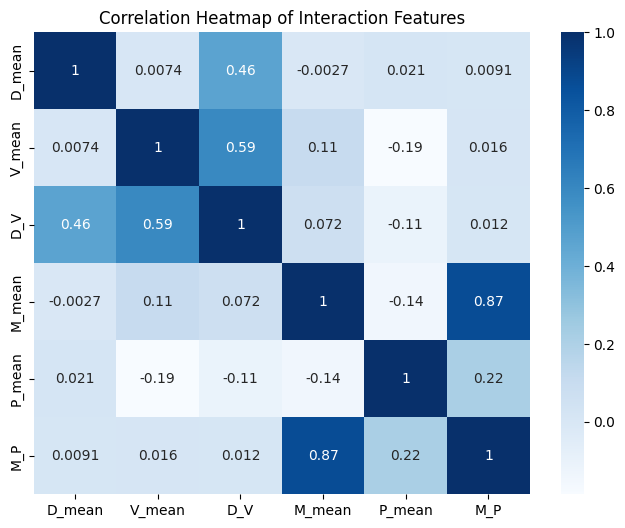

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

interaction_cols = ['D_mean', 'V_mean', 'D_V', 'M_mean', 'P_mean', 'M_P']

plt.figure(figsize=(8,6))
sns.heatmap(train[interaction_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Interaction Features")
plt.show()


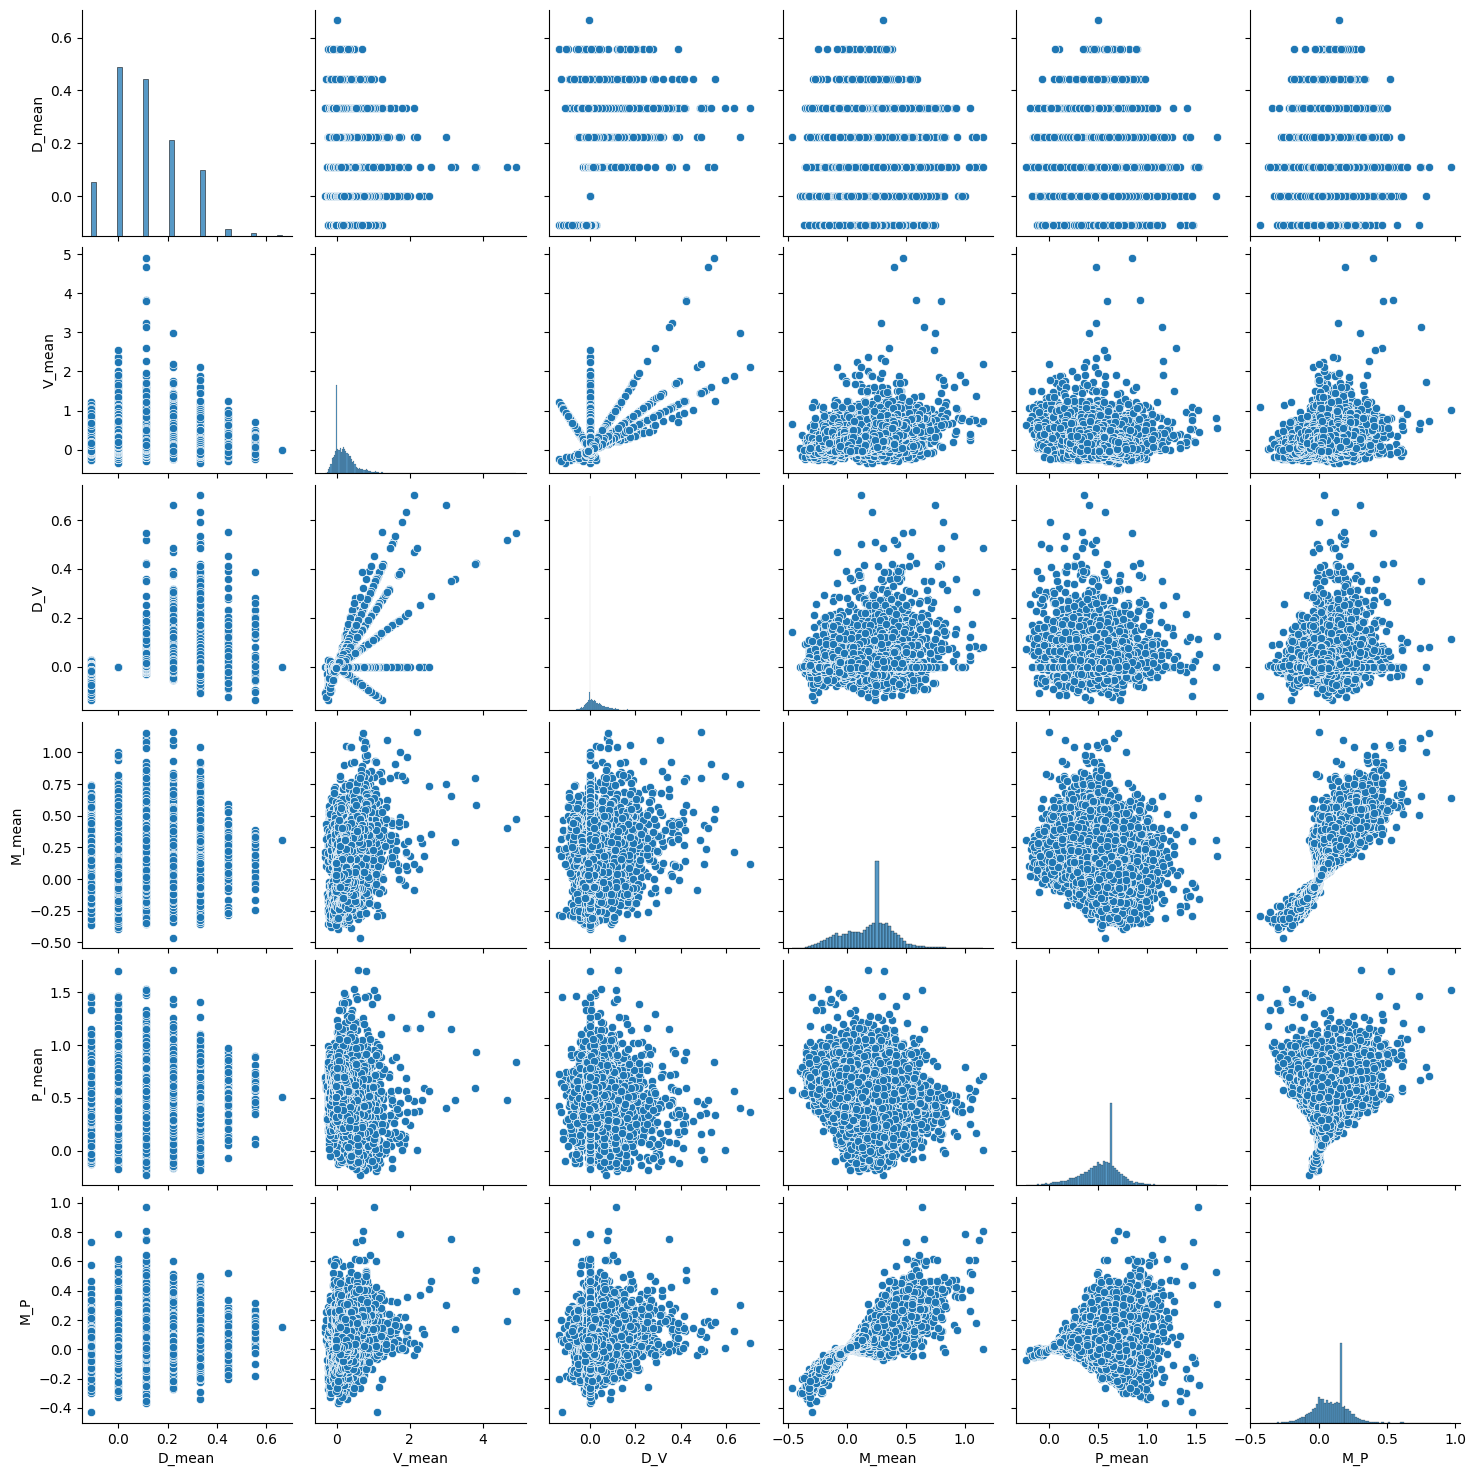

In [16]:
import seaborn as sns

interaction_cols = ['D_mean', 'V_mean', 'D_V', 'M_mean', 'P_mean', 'M_P']

sns.pairplot(train[interaction_cols])
plt.show()


## Train Model

## LightGBM

In [23]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import lightgbm as lgb

# numeric
train = train.apply(pd.to_numeric, errors='coerce')
train['date_id'] = train['date_id'].astype(int)

train = train.dropna(thresh=70, axis=0).reset_index(drop=True)

print(f" shape after cleaning : {train.shape[0]}")
print(f" date_id: {train['date_id'].min()} | آخر date_id: {train['date_id'].max()}")


feature_cols = [col for col in train.columns if col not in ['date_id', 'forward_returns']]
X = train[feature_cols]
y = train["forward_returns"]

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = []
r2_scores = []

for fold, (trn_idx, val_idx) in enumerate(tscv.split(X)):
    print(f"\n===== Fold {fold+1}/5 =====")
    print(f"Train dates: {train.iloc[trn_idx]['date_id'].min()} → {train.iloc[trn_idx]['date_id'].max()}")
    print(f"Valid dates: {train.iloc[val_idx]['date_id'].min()} → {train.iloc[val_idx]['date_id'].max()}")

    X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

    model = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        learning_rate=0.03,
        num_leaves=64,
        max_depth=-1,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=5,
        n_estimators=5000,
        min_child_samples=20,
        verbosity=-1,
        random_state=42
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(100), lgb.log_evaluation(200)]
    )

    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold+1} → RMSE: {rmse:.6f} | R²: {r2:.6f}")

print("\n" + "="*50)
print(f"AVG RMSE: {np.mean(rmse_scores):.6f}")
print(f"AVG R²:   {np.mean(r2_scores):.6f}")
print("="*50)

 shape after cleaning : 9048
 date_id: 0 | آخر date_id: 9047

===== Fold 1/5 =====
Train dates: 0 → 1507
Valid dates: 1508 → 3015
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.00229695
[400]	valid_0's rmse: 0.00229999
Early stopping, best iteration is:
[302]	valid_0's rmse: 0.00227179
Fold 1 → RMSE: 0.002272 | R²: 0.964679

===== Fold 2/5 =====
Train dates: 0 → 3015
Valid dates: 3016 → 4523
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.000874932
[400]	valid_0's rmse: 0.000796165
[600]	valid_0's rmse: 0.000785411
Early stopping, best iteration is:
[679]	valid_0's rmse: 0.000780196
Fold 2 → RMSE: 0.000780 | R²: 0.993819

===== Fold 3/5 =====
Train dates: 0 → 4523
Valid dates: 4524 → 6031
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.00116352
[400]	valid_0's rmse: 0.00111162
Early stopping, best iteration is:
[336]	valid_0's rmse: 0.0011059
Fold 3 → RMSE: 0.001106 | R²: 

In [25]:
import lightgbm as lgb
import pandas as pd

# Refit on full data

exclude_columns = ['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

full_features = [col for col in train.columns if col not in exclude_columns]

X_full = train[full_features]
y_full = train['forward_returns']

model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    n_estimators=3000,
    min_child_samples=20,
    verbosity=-1,
    random_state=42
)

print("Train Model -> full data")
model.fit(X_full, y_full)
print("Train Model is Done!")


# Prediction on test
available_features = [col for col in full_features if col in test.columns]
test_X = test[available_features].copy()

missing_features = set(full_features) - set(available_features)
for col in missing_features:
    test_X[col] = 0

test_X = test_X[full_features]

# Predict
predictions = model.predict(test_X)

# Submission
submission = pd.DataFrame({
    'date_id': test['date_id'],
    'forward_returns': predictions
})

submission.to_parquet('submission.parquet', index=False)
print("save submission.parquet is done!")
print(submission.head())

Train Model -> full data
Train Model is Done!
save submission.parquet is done!
   date_id  forward_returns
0     8980        -0.005851
1     8981        -0.007160
2     8982         0.005326
3     8983         0.008149
4     8984        -0.002742
